<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/P9_Simulacio%CC%81n_Poisson_ModV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Si se quiere ejecutar el código
1. Hacer click en el icono Google Colab
2. En Colab, cargar el archivo data.csv en Archivos de lado izquierdo.

# PRACTICA 9:

Dado el método para generar v.a. discretas. Diseñe un generador para una distribución Poisson. Genere 100 v.a.  y grafique la distribución

INTEGRANTES:

* Cariño Díaz David
* Márquez Sánchez Moisés
* Martínez Romualdo Valeria
* Mondragón Miranda Néstor Yair
* Reyes Cruz Alejandro
* Torres Bustamante Dulce Johana

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

Sea $X \sim Poisson(λ)$, $X$ describe el número de ocurrencias de un evento dentro de un intervalo de tiempo establecido. Esta es represenada por la función de probabilidad siguiente:
$$ f(x)= \frac{e^{-λ} λ^x}{x!} $$
La anterior función tiene un soporte/rango de valores de 0 hasta infinito por lo que para replicar la metodologia vista en clase es necesario el utilxar una función ciclic de apoyo.

Por prácticidad descomponemos la fdp como sigue:
$$ \frac{e^{-λ} λ^x}{x!} = e^{-λ} ⋅ \frac{λ^x}{x!} $$
Además, sean los valores $x, x+1$:
$$ \frac{λ^x}{x!} ⋅\frac{λ}{x+1} =  \frac{λ^{x+1}}{(x+1)!} $$

In [6]:
def poisson_U(lamb, n): #Valores de entrada: parámetro lamda y número de valores requeridos
    Y = pd.DataFrame({'valor': np.zeros(n)})
    for i in range(n):
        U = np.random.uniform(0, 1)
        x = 0
        p = np.exp(-lamb)
        Fx = p #Variable para la función de distribución acumulada
        while Fx < U:
            x = x + 1
            p = p * (lamb/ x)
            Fx = Fx + p
        Y.iloc[i, 0] = x
    return Y

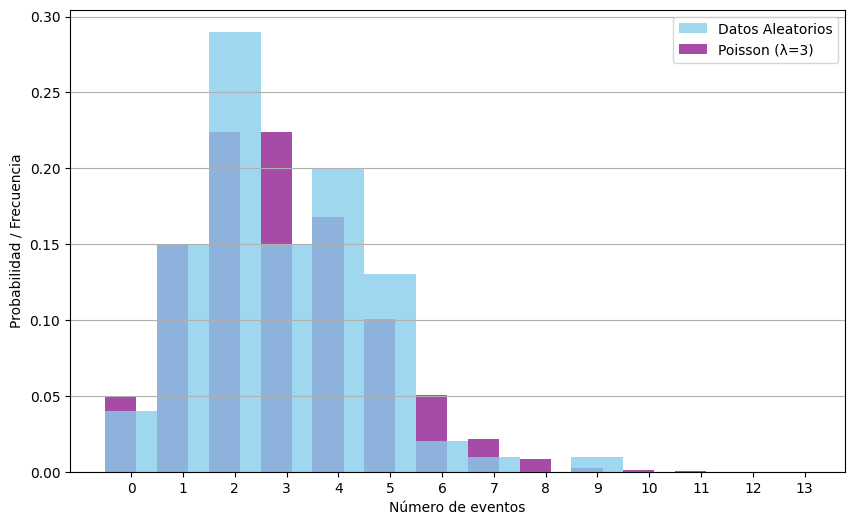

In [7]:
#Veamos la gráfica de una muestra de 100 v.a. con un parámetro lambda de 3
ld = 3
sample = poisson_U(ld, 100)
z= int(sample['valor'].max())

values = np.arange(0, z + 5)
pmf_values = poisson.pmf(values, ld)
pmf_values = poisson.pmf(values, ld)

plt.figure(figsize=(10, 6))
plt.bar(values - 0.2, pmf_values, width=0.6, color='purple' , alpha=0.7, label='Poisson (λ=3)', align='center')
plt.hist(sample['valor'], bins=np.arange(-0.5, z + 1.5, 1), density=True, alpha=0.8, color='skyblue', label='Datos Aleatorios')
plt.xlabel('Número de eventos')
plt.ylabel('Probabilidad / Frecuencia')
plt.xticks(values)
plt.grid(axis='y')
plt.legend()
plt.show()

Vemos que efectivamente el histograma de los vectores de muestras de tamaño 100 construidos a partir de nuestra función definida tienen un comportamiento muy parecido al histograma real de una v.a. Poisson con lambda 3.

Finalmente, haremos una comparación entre los 4 vectores de 100 números aleatorios obtenidos en prácticas anteriores para ver cual de ellos géneran una simulación de v.a. Poisson más acertada, teniendo en cuenta un parámetro lambda 5.

In [8]:
df = pd.read_csv("Aleatorios.csv")
df.head()

,N.,Método Cuadrados medios,Método Congruencial,Método Congruencial Mixto,Aleatorios Google Sheets {RAND()}
0,1,0.1306,0.67772,0.20238,0.90695
1,2,0.7056,0.06114,0.82143,0.89742
2,3,0.7871,0.26738,0.44048,0.05639
3,4,0.9526,0.05401,0.05952,0.74104
4,5,0.7446,0.91762,0.67857,0.04887


In [9]:
#Adaptamos la fórmula para calcular los X's para valores individuales
def poi_V(u, lamb): #Valores de entrada: número aleatorio, y lamda
    x = 0
    p = np.exp(-lamb)
    Fx = p
    while Fx < u:
      x = x + 1
      p = p * (lamb/ x)
      Fx = Fx + p
    return x

In [10]:
dx = pd.DataFrame({'Cuadrados Medios' : df['Método Cuadrados medios'].apply(lambda x: poi_V(x,5)),
                   'Congruencial' : df['Método Congruencial'].apply(lambda x: poi_V(x,5)),
                   'Congruencial Mixto' : df['Método Congruencial  Mixto '].apply(lambda x: poi_V(x,5)),
                   'Aleatorio Google Sheets' : df['Aleatorios Google Sheets {RAND()}'].apply(lambda x: poi_V(x,5))
                   })
dx.head(3)

,Cuadrados Medios,Congruencial,Congruencial Mixto,Aleatorio Google Sheets
0,3,6,3,8
1,6,2,7,8
2,7,4,4,2


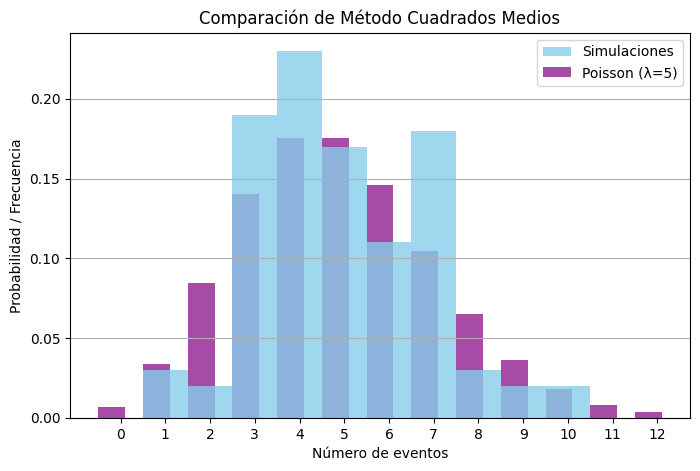

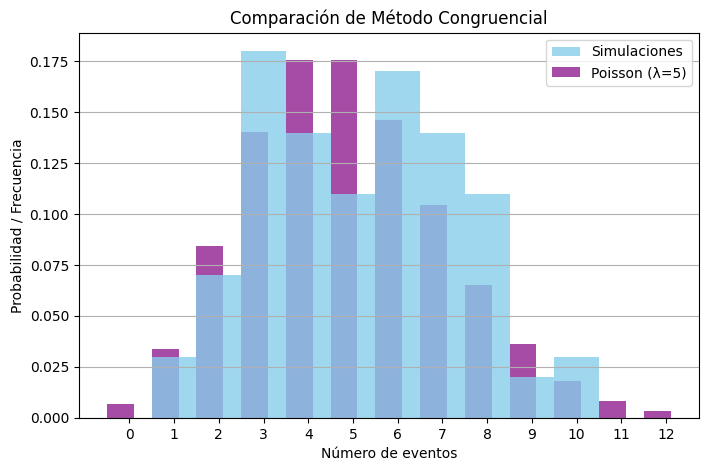

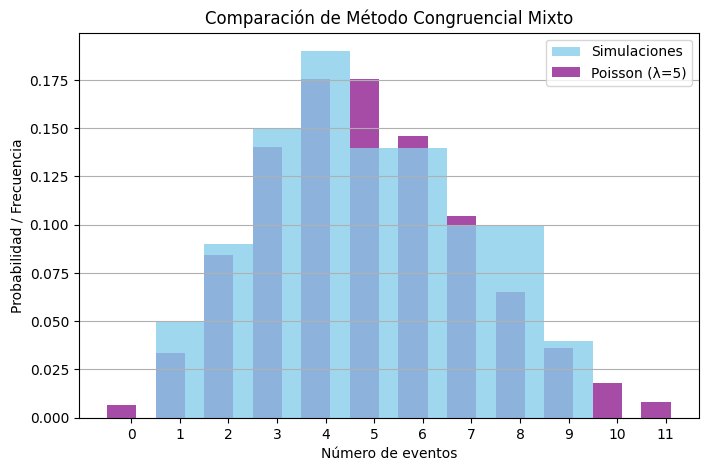

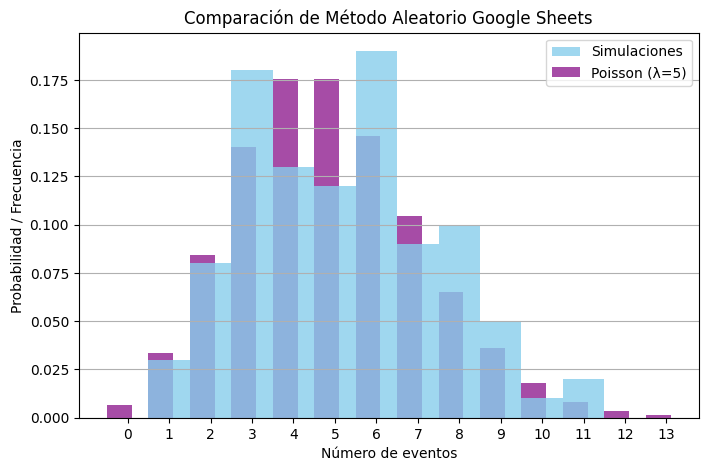

In [11]:
ld = 5
for i in dx.columns:
  values = np.arange(0, dx[i].max() + 3)
  pmf_values = poisson.pmf(values, ld)
  plt.figure(figsize=(8, 5))
  plt.bar(values - 0.2, pmf_values, width=0.6, color='purple' , alpha=0.7, label='Poisson (λ=5)', align='center')
  plt.hist(dx[i], bins=np.arange(-0.5, dx[i].max() + 1.5, 1), density=True, alpha=0.8, color='skyblue', label=f"Simulaciones")
  plt.title(f"Comparación de Método {i}")
  plt.xlabel('Número de eventos')
  plt.ylabel('Probabilidad / Frecuencia')
  plt.xticks(values)
  plt.grid(axis='y')
  plt.legend()
  plt.show()

Así, comparando las gráficas obtenemos que los valores que mejor ajustan a una simulación para una v.a. Poisson(5) son los obtenidos por el Método Congruencial Mixto